In [1]:
# descision treeesssss

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [2]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
df['Drug_num'] = df['Drug'].map(custom_map)

In [7]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [8]:
df.drop(['Drug'], axis=1).corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug_num,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


Text(0, 0.5, 'Count')

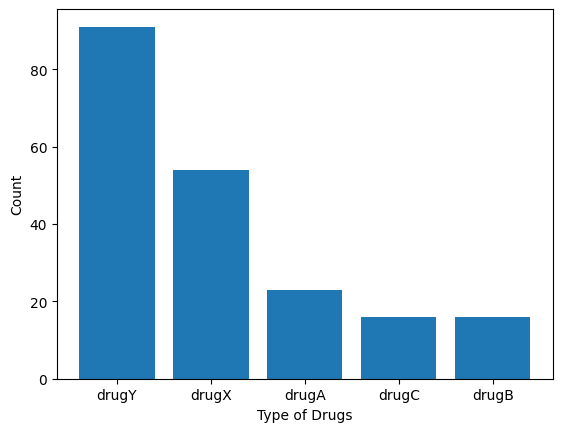

In [9]:
data = df['Drug'].value_counts()
plt.bar(data.index, data.values)
plt.xlabel('Type of Drugs')
plt.ylabel("Count")

In [10]:
y = df['Drug_num']
X = df.drop(['Drug', 'Drug_num'], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.3)



| Node Purity                         | Gini   | Entropy |
| :---------------------------------- | :----- | :------ |
| Pure (100% one class)               | 0      | 0       |
| 50-50 split (two classes)           | 0.5    | 1       |
| Highly mixed (3+ classes, balanced) | higher | higher  |


In [12]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
tree_predictions= drugTree.predict(X_test)
metrics.accuracy_score(y_test, tree_predictions)

0.9833333333333333

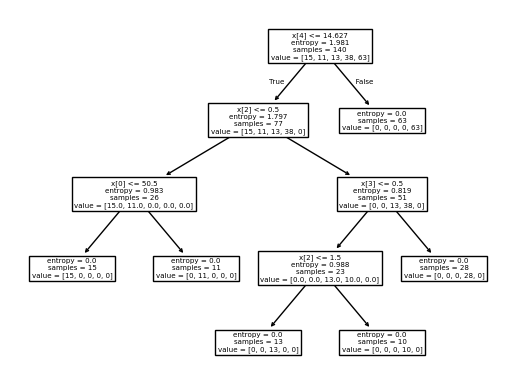

In [14]:
plot_tree(drugTree)
plt.show()

Meaning:
x[4] <= 14.027 → Split condition: if feature x[4] is less than or equal to 14.027

entropy = 1.981 → Impurity at this node

samples = 140 → Number of data points at this node

value = [15, 11, 13, 38, 63] → Distribution of data points in each class
(5 classes in total — class 0 has 15, class 1 has 11, and so on)

In [15]:
metrics.confusion_matrix(y_test, tree_predictions)


array([[ 8,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 15,  1],
       [ 0,  0,  0,  0, 28]])

confusion matrix, f1 score, accuracy score, OvO and OvA
gini impurity formulas, entropy, setting max_depth

 One-vs-All (OvA)
📌 Idea:
For a problem with 
𝐶
C classes:
➝ Build C separate binary classifiers

Each classifier predicts whether a sample belongs to one class vs all other classes

📌 Example (3 classes: A, B, C)
Classifier 1: A vs (B + C)

Classifier 2: B vs (A + C)

Classifier 3: C vs (A + B)



OVO
 Idea:
For a problem with 
𝐶
C classes:
➝ Build a separate binary classifier for every pair of classes

Total classifiers = 
c(c-1)/2
​
 

📌 Example (3 classes: A, B, C)
Classifier 1: A vs B

Classifier 2: A vs C

Classifier 3: B vs C


In [16]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [17]:
raw_data['tip_amount'].isnull().sample(10)

28585    False
18444    False
41062    False
14540    False
14485    False
24745    False
19016    False
13108    False
7851     False
36767    False
Name: tip_amount, dtype: bool

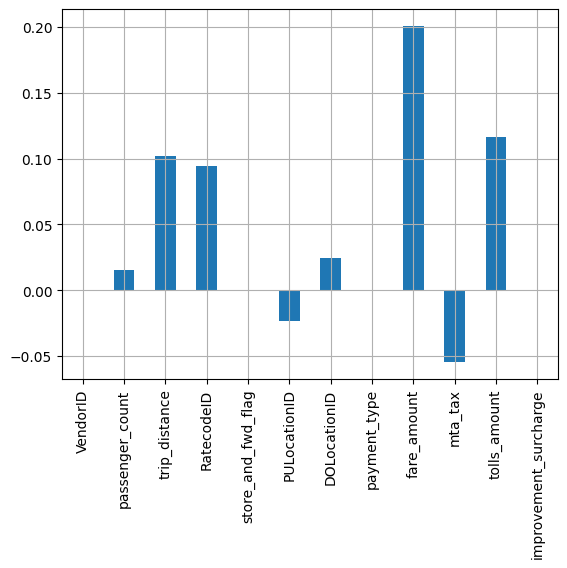

In [18]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind = 'bar')
plt.grid(True)

In [19]:
raw_data.dtypes

VendorID                   int64
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag         int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
mta_tax                  float64
tolls_amount             float64
improvement_surcharge      int64
tip_amount               float64
dtype: object


Use normalize() when you care about the shape/ratios of a data point, not its size.
(like comparing text vectors, proportions within a transaction)

Use StandardScaler() when features (columns) have different units or scales, and you want to bring them to a common scale for fair comparison.
(like height, weight, and income)



Axis=1 means “move across columns for each row” — so the operation is applied per row.
And in drop(), you're removing along that axis
In normalize(), you're normalizing each data point along that axis

In [48]:
from sklearn.preprocessing import normalize

y = raw_data['tip_amount'].values.astype('float32')
df = raw_data.drop('tip_amount', axis=1)
df = df.drop(['store_and_fwd_flag', 'VendorID', 'improvement_surcharge', 'payment_type'], axis=1)
X = df.values
X = normalize(X, axis=1, norm='l1', copy=False)



In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

array([[0.00296428, 0.05309026, 0.00592856, ..., 0.20749963, 0.00148214,
        0.02057211],
       [0.00330622, 0.05937975, 0.00661244, ..., 0.23143556, 0.00165311,
        0.        ],
       [0.00440742, 0.07664507, 0.00881484, ..., 0.30851955, 0.00220371,
        0.        ],
       ...,
       [0.00311789, 0.06637982, 0.00623577, ..., 0.21825211, 0.00155894,
        0.02163814],
       [0.00842637, 0.04267959, 0.00421319, ..., 0.14746155, 0.0010533 ,
        0.01461976],
       [0.0025433 , 0.04514357, 0.0050866 , ..., 0.17803098, 0.00127165,
        0.0176505 ]], shape=(28841, 8))

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
regressorTree = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8, random_state=45)
regressorTree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, random_state=45)

High $R^2$ and low $MSE$ values are expected from a good regression model.

In [51]:
y_pred = regressorTree.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))
regressorTree.score(X_test,y_test)

MSE score : 24.667


0.023438115413928484